In [525]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [526]:
df=pd.read_excel("Final_Train.xlsx")

In [527]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [529]:
df["rating(%)"]=df["Rating"].str.split("%").str[0]


In [530]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,rating(%)
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,98
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,100


In [531]:
df["rating(%)"]=pd.to_numeric(df["rating(%)"], errors='coerce')

In [532]:
df["rating(%)"]=df["rating(%)"].fillna(df["rating(%)"].median())

In [533]:
df.drop("Rating",axis=1,inplace=True)

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   object 
 2   Place               5936 non-null   object 
 3   Profile             5961 non-null   object 
 4   Miscellaneous_Info  3341 non-null   object 
 5   Fees                5961 non-null   int64  
 6   rating(%)           5961 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 326.1+ KB


In [535]:
df["Experience"]=df["Experience"].str.split(" ").str[0]

In [536]:
df["Experience"]=pd.to_numeric(df["Experience"], errors='coerce')

In [537]:
df.head()

,Qualification,Experience,Place,Profile,Miscellaneous_Info,Fees,rating(%)
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,100.0
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,98.0
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,97.0
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,97.0
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,100.0


# Replace null with mode

In [538]:
df["Place"] =df.Place.fillna(df["Place"].mode()[0])


In [539]:
df.Miscellaneous_Info.value_counts().sort_values(ascending=False)

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
                                                                                        ..
Critical Care Diabetes Management Headache Management                                    1
Scaling / Polishing Zirconia Crowns Bone Grafting for Dental Implants                    1
HIV/AIDS Physician HIV/AIDS Medicine HIV Counselling                                     1
99% 854 Feedback Kamla Nagar, Delhi                                                      1
1 Feedback Shalimar Bagh, Delhi ₹1,000                                                   1

In [540]:
df.drop("Miscellaneous_Info",axis=1,inplace=True)

In [541]:
df["Location"]=df["Place"].str.split(",").str[0]

df["City"]=df["Place"].str.split(",").str[1]
df["city2"]=df["Place"].str.split(",").str[2]

In [542]:
df["city2"].unique()

array([nan, ' Delhi'], dtype=object)

From the above there is one value in city 2 which is Delhi therefore replacing it with Sector 5 

In [543]:
df["City"]= df["City"].str.replace("Sector 5", "Delhi") 

In [544]:
df.drop(columns=["Place","city2"],axis=1,inplace=True)

In [545]:
df.isnull().sum()

Qualification    0
Experience       0
Profile          0
Fees             0
rating(%)        0
Location         0
City             1
dtype: int64

In [546]:
df["City"]=df["City"].fillna(df["City"].mode()[0])

In [547]:
df.head()

,Qualification,Experience,Profile,Fees,rating(%),Location,City
0,"BHMS, MD - Homeopathy",24,Homeopath,100,100.0,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,Ayurveda,350,98.0,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,ENT Specialist,300,97.0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,Ayurveda,250,97.0,Bannerghatta Road,Bangalore
4,BAMS,20,Ayurveda,250,100.0,Keelkattalai,Chennai


In [548]:
df["degree1"]=df["Qualification"].str.split(",").str[0]
df["degree2"]=df["Qualification"].str.split(",").str[1]


In [549]:
df.replace(to_replace =np.NaN, 
                 value ="missing",inplace=True) 

In [550]:
df["degree1"].value_counts()

MBBS                              2448
BDS                               1208
BAMS                               711
BHMS                               706
MD - Dermatology                    84
                                  ... 
MSc                                  1
Certificate in Dental Implants       1
MSc - Endocrinology(UK)              1
M.Ch                                 1
Post MD SR AIIMS                     1
Name: degree1, Length: 151, dtype: int64

df.drop("degree2",axis=1,inplace=True)

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5961 non-null   object 
 1   Experience     5961 non-null   int64  
 2   Profile        5961 non-null   object 
 3   Fees           5961 non-null   int64  
 4   rating(%)      5961 non-null   float64
 5   Location       5961 non-null   object 
 6   City           5961 non-null   object 
 7   degree1        5961 non-null   object 
 8   degree2        5961 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 419.3+ KB


# UNIVARIATE ANALYSIS

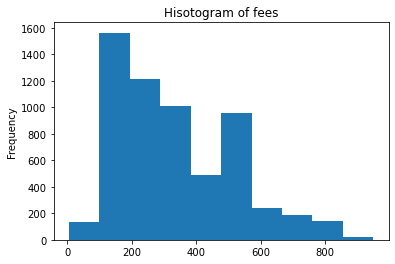

Maximum fees is: 950 
 Minimum fees is : 5


In [552]:
df["Fees"].plot.hist(bins=10)
plt.title("Hisotogram of fees")
plt.show()
print("Maximum fees is:",df["Fees"].max(),"\n","Minimum fees is :",df["Fees"].min())

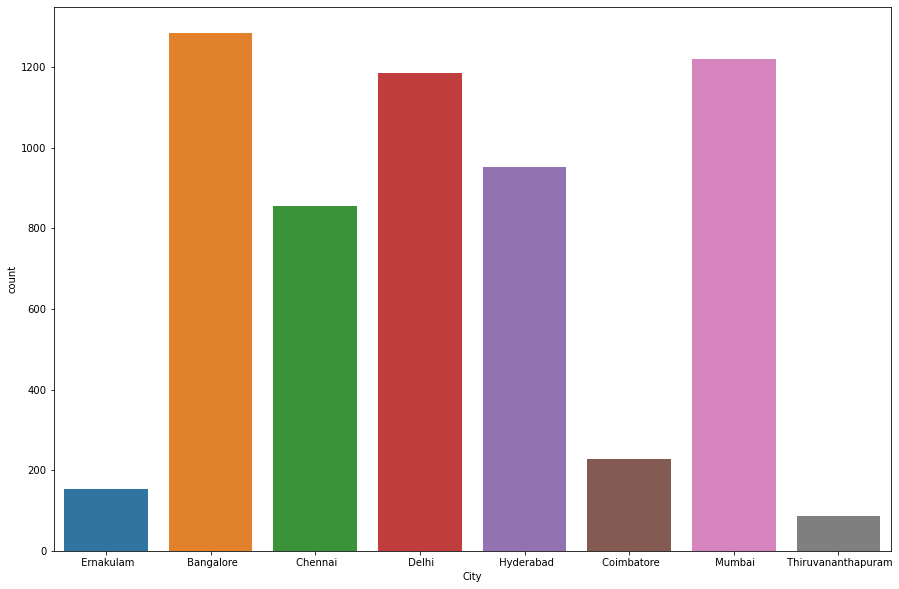

In [553]:
plt.figure(figsize=(15,10))
sns.countplot(df["City"])
plt.show()

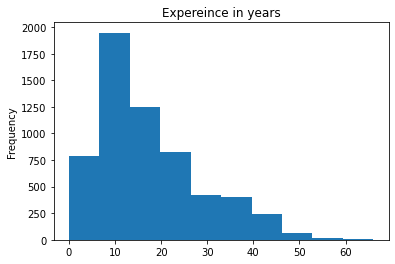

In [554]:
df["Experience"].plot.hist(bins=10)
plt.title("Expereince in years")
plt.show()

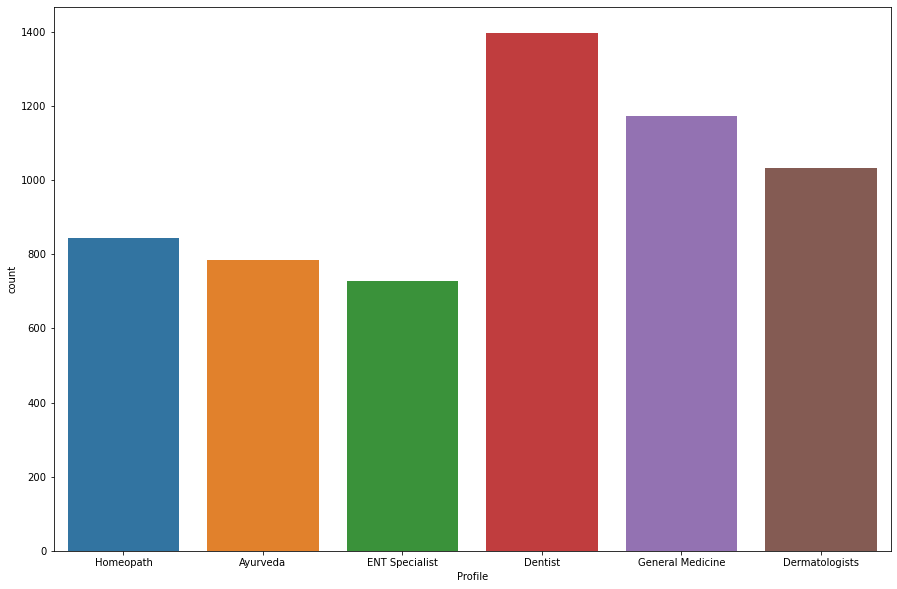

In [555]:
plt.figure(figsize=(15,10))
sns.countplot(df["Profile"])
plt.show()

Observation:Highest count of Dentist followed by General Medicine

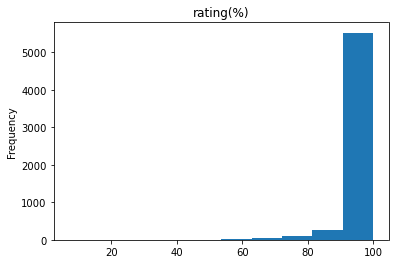

Maximum rating is: 100.0 
 Minimum rating is : 7.0


In [556]:
df["rating(%)"].plot.hist(bins=10)
plt.title("rating(%)")
plt.show()
print("Maximum rating is:",df["rating(%)"].max(),"\n","Minimum rating is :",df["rating(%)"].min())

# BIVARIATE ANALYSIS

City
 Bangalore             324.364486
 Chennai               283.602339
 Coimbatore            154.298246
 Delhi                 362.911392
 Ernakulam             188.431373
 Hyderabad             307.507886
 Mumbai                308.292863
 Thiruvananthapuram    167.267442
Name: Fees, dtype: float64


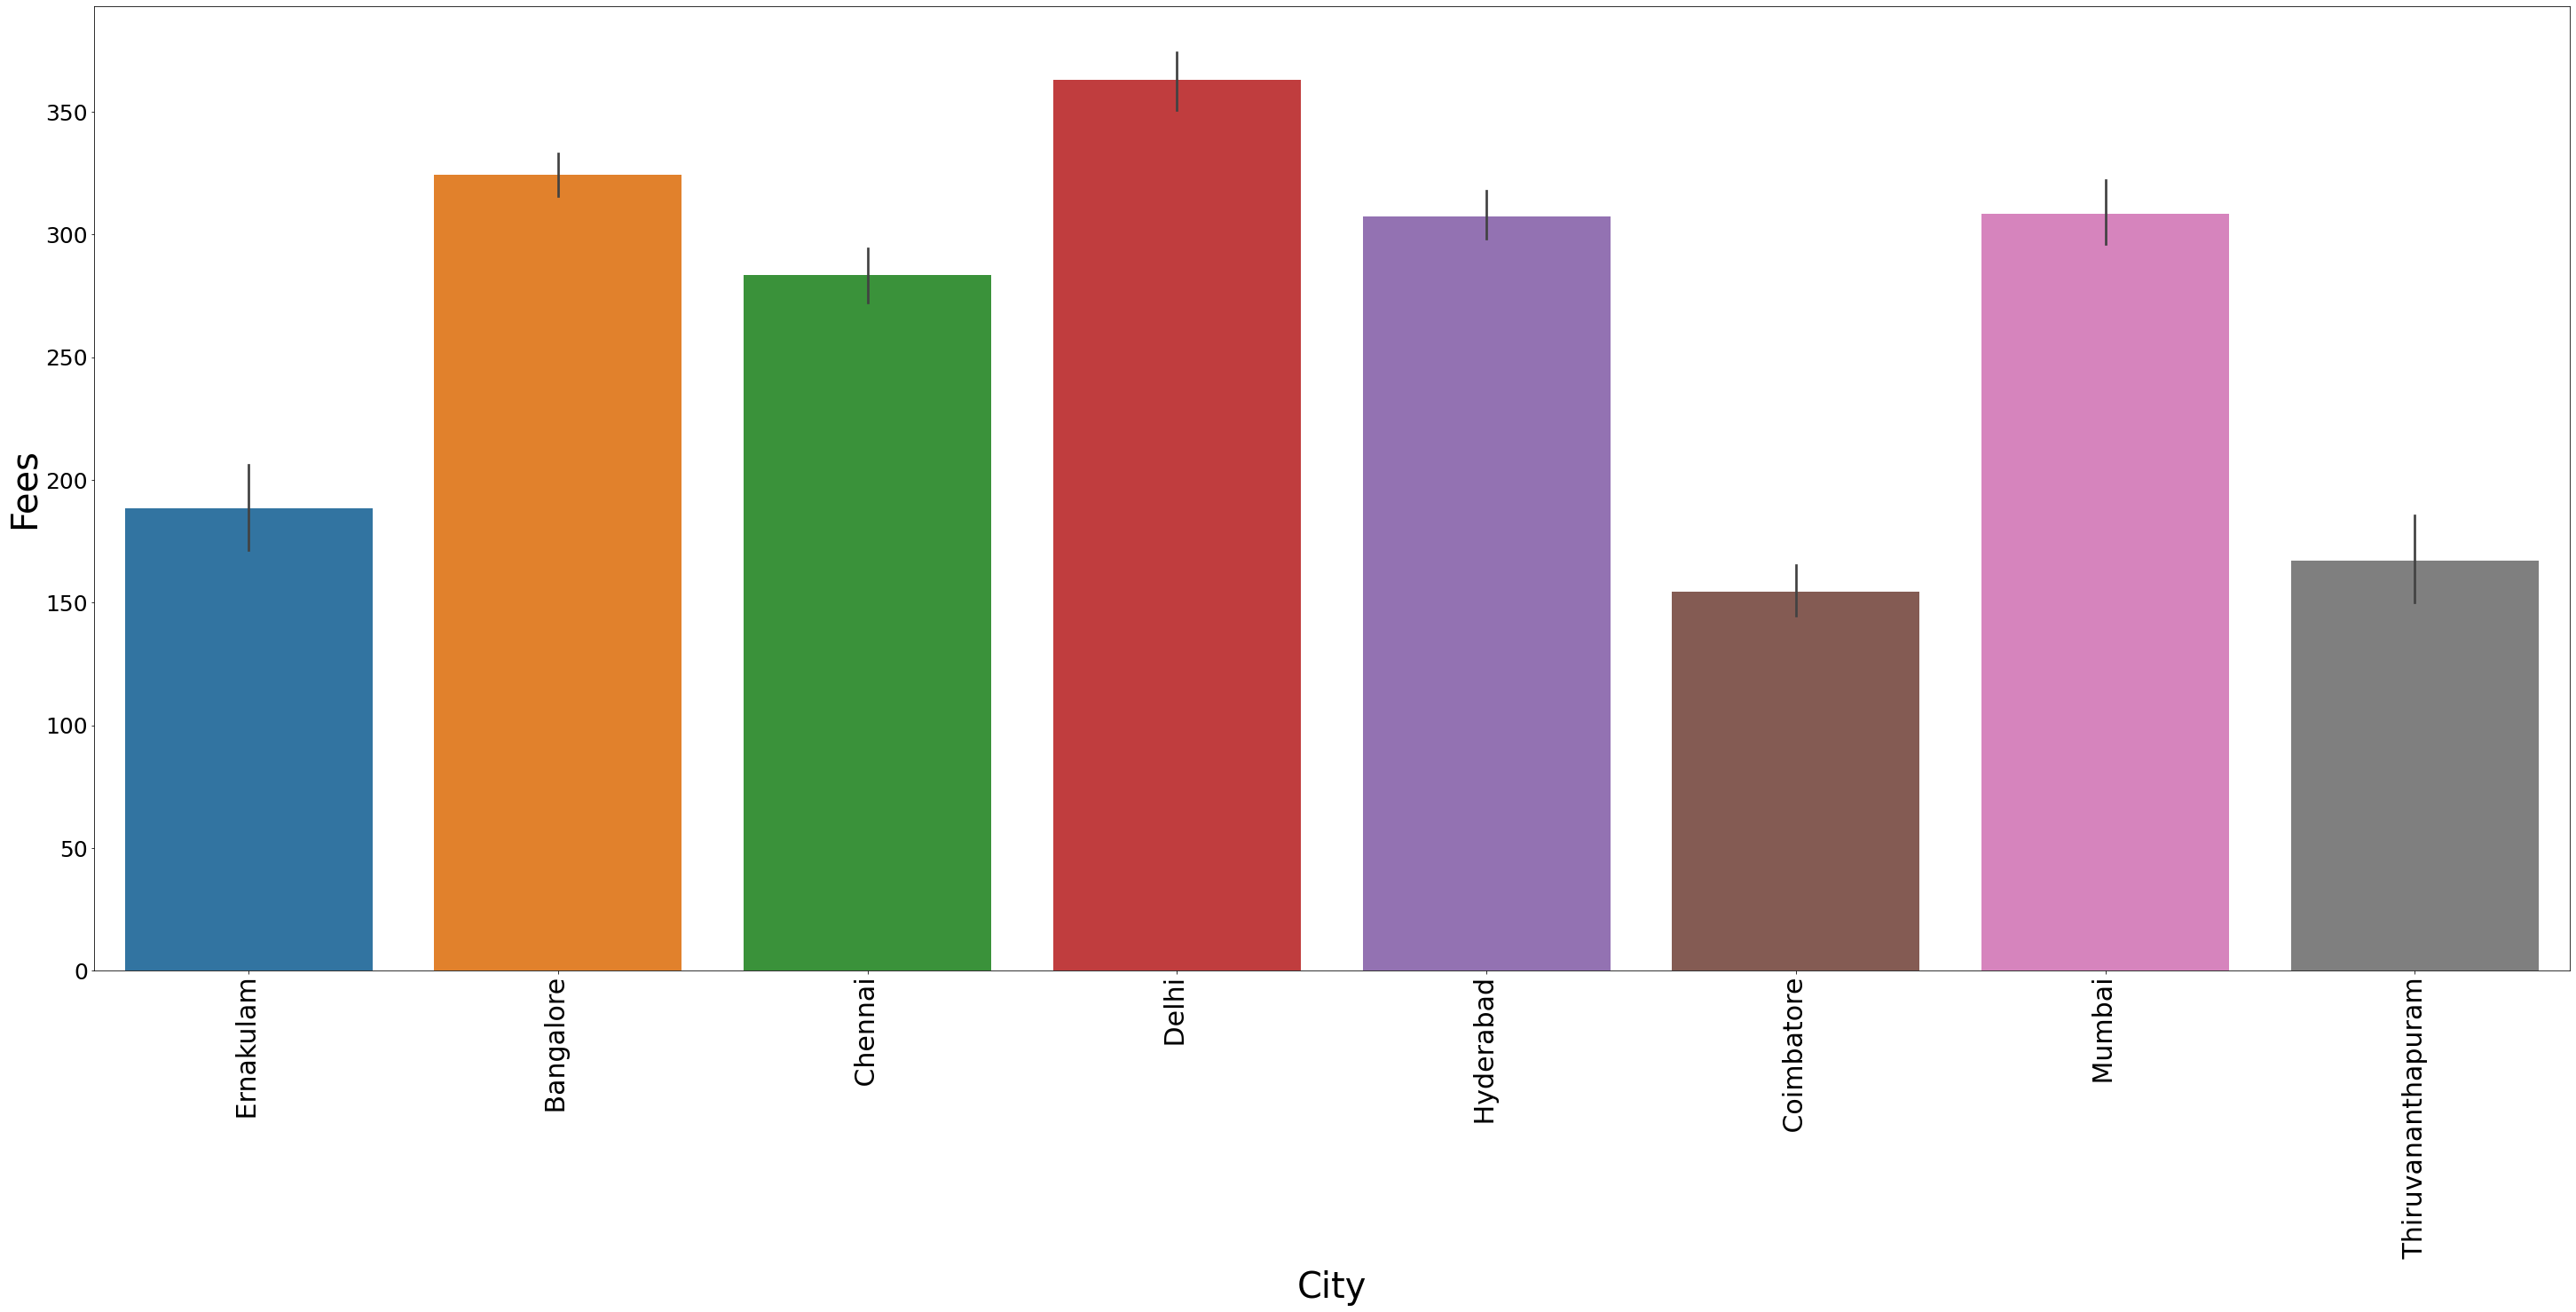

In [557]:
plt.figure(figsize=(50,20))
plt.xlabel("City", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="City",y="Fees",data=df)
print(df.groupby("City").Fees.mean())

Observation: The doctor's fees is more in Delhi followed by Bangalore and least in Coimbatore

Profile
Ayurveda            238.968193
Dentist             238.199714
Dermatologists      393.133462
ENT Specialist      387.321429
General Medicine    313.908781
Homeopath           306.499407
Name: Fees, dtype: float64


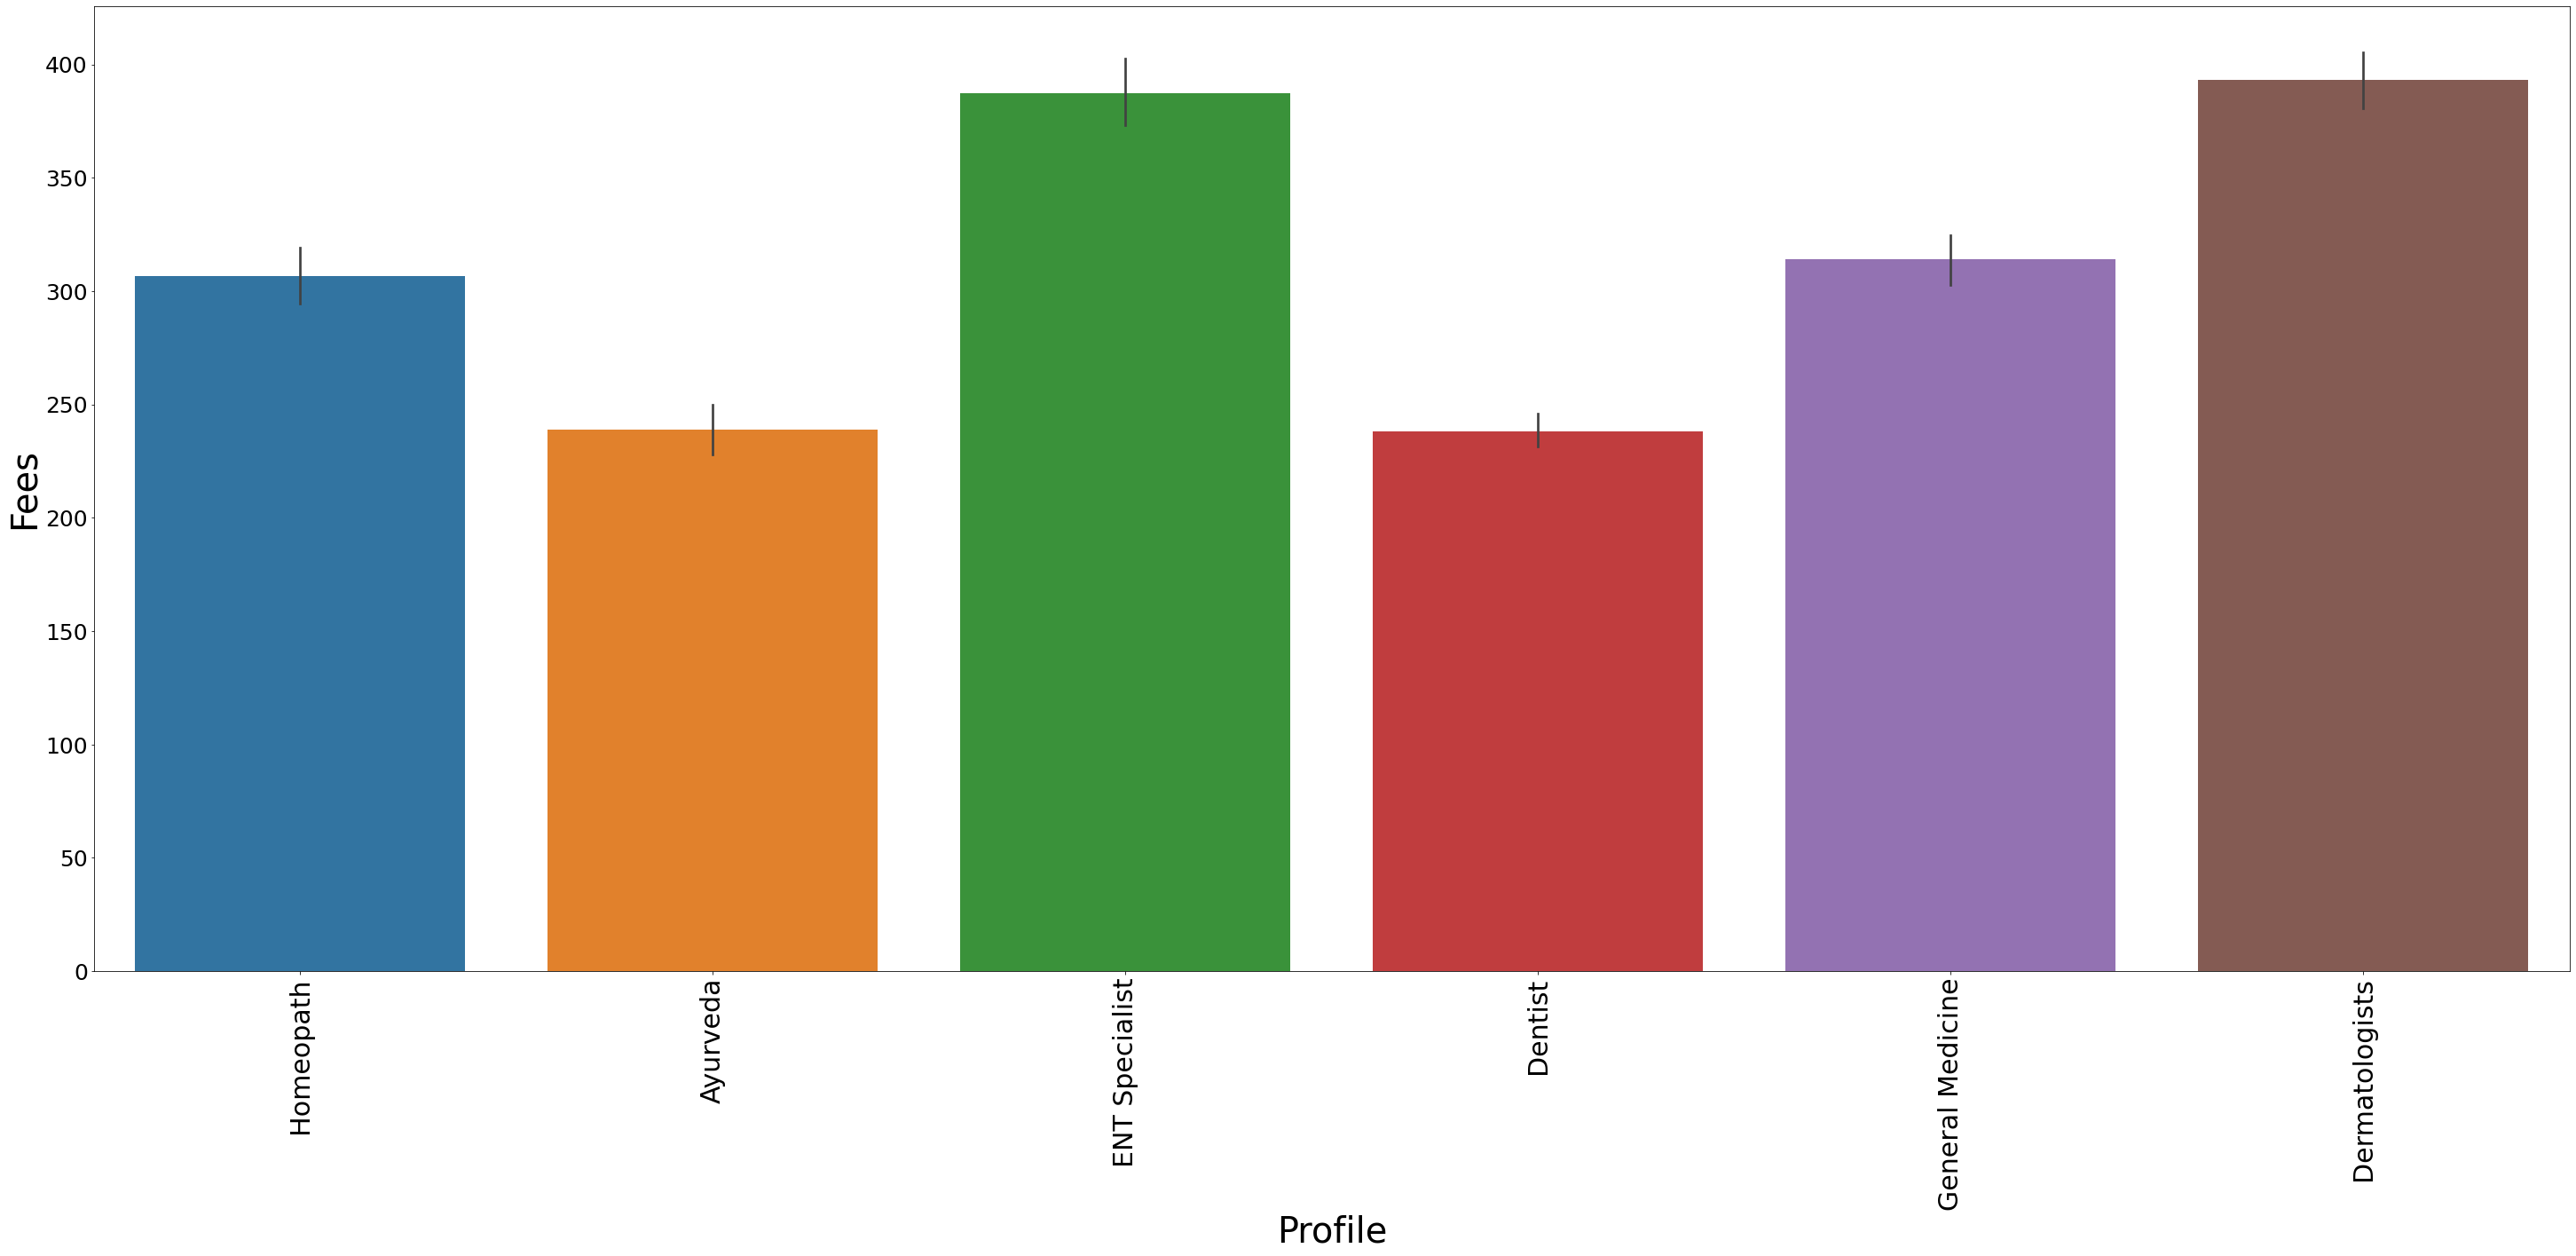

In [558]:
plt.figure(figsize=(50,20))
plt.xlabel("Profile", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="Profile",y="Fees",data=df)
print(df.groupby("Profile").Fees.mean())

Observation:The fees is maximum for Dermatologist and least for Dentist

In [559]:
#Creating labels for better visaulization 
rating_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90-99','100-109']
df['rating_group'] = pd.cut(df["rating(%)"], range(0, 111, 10), right=False, labels=rating_labels)


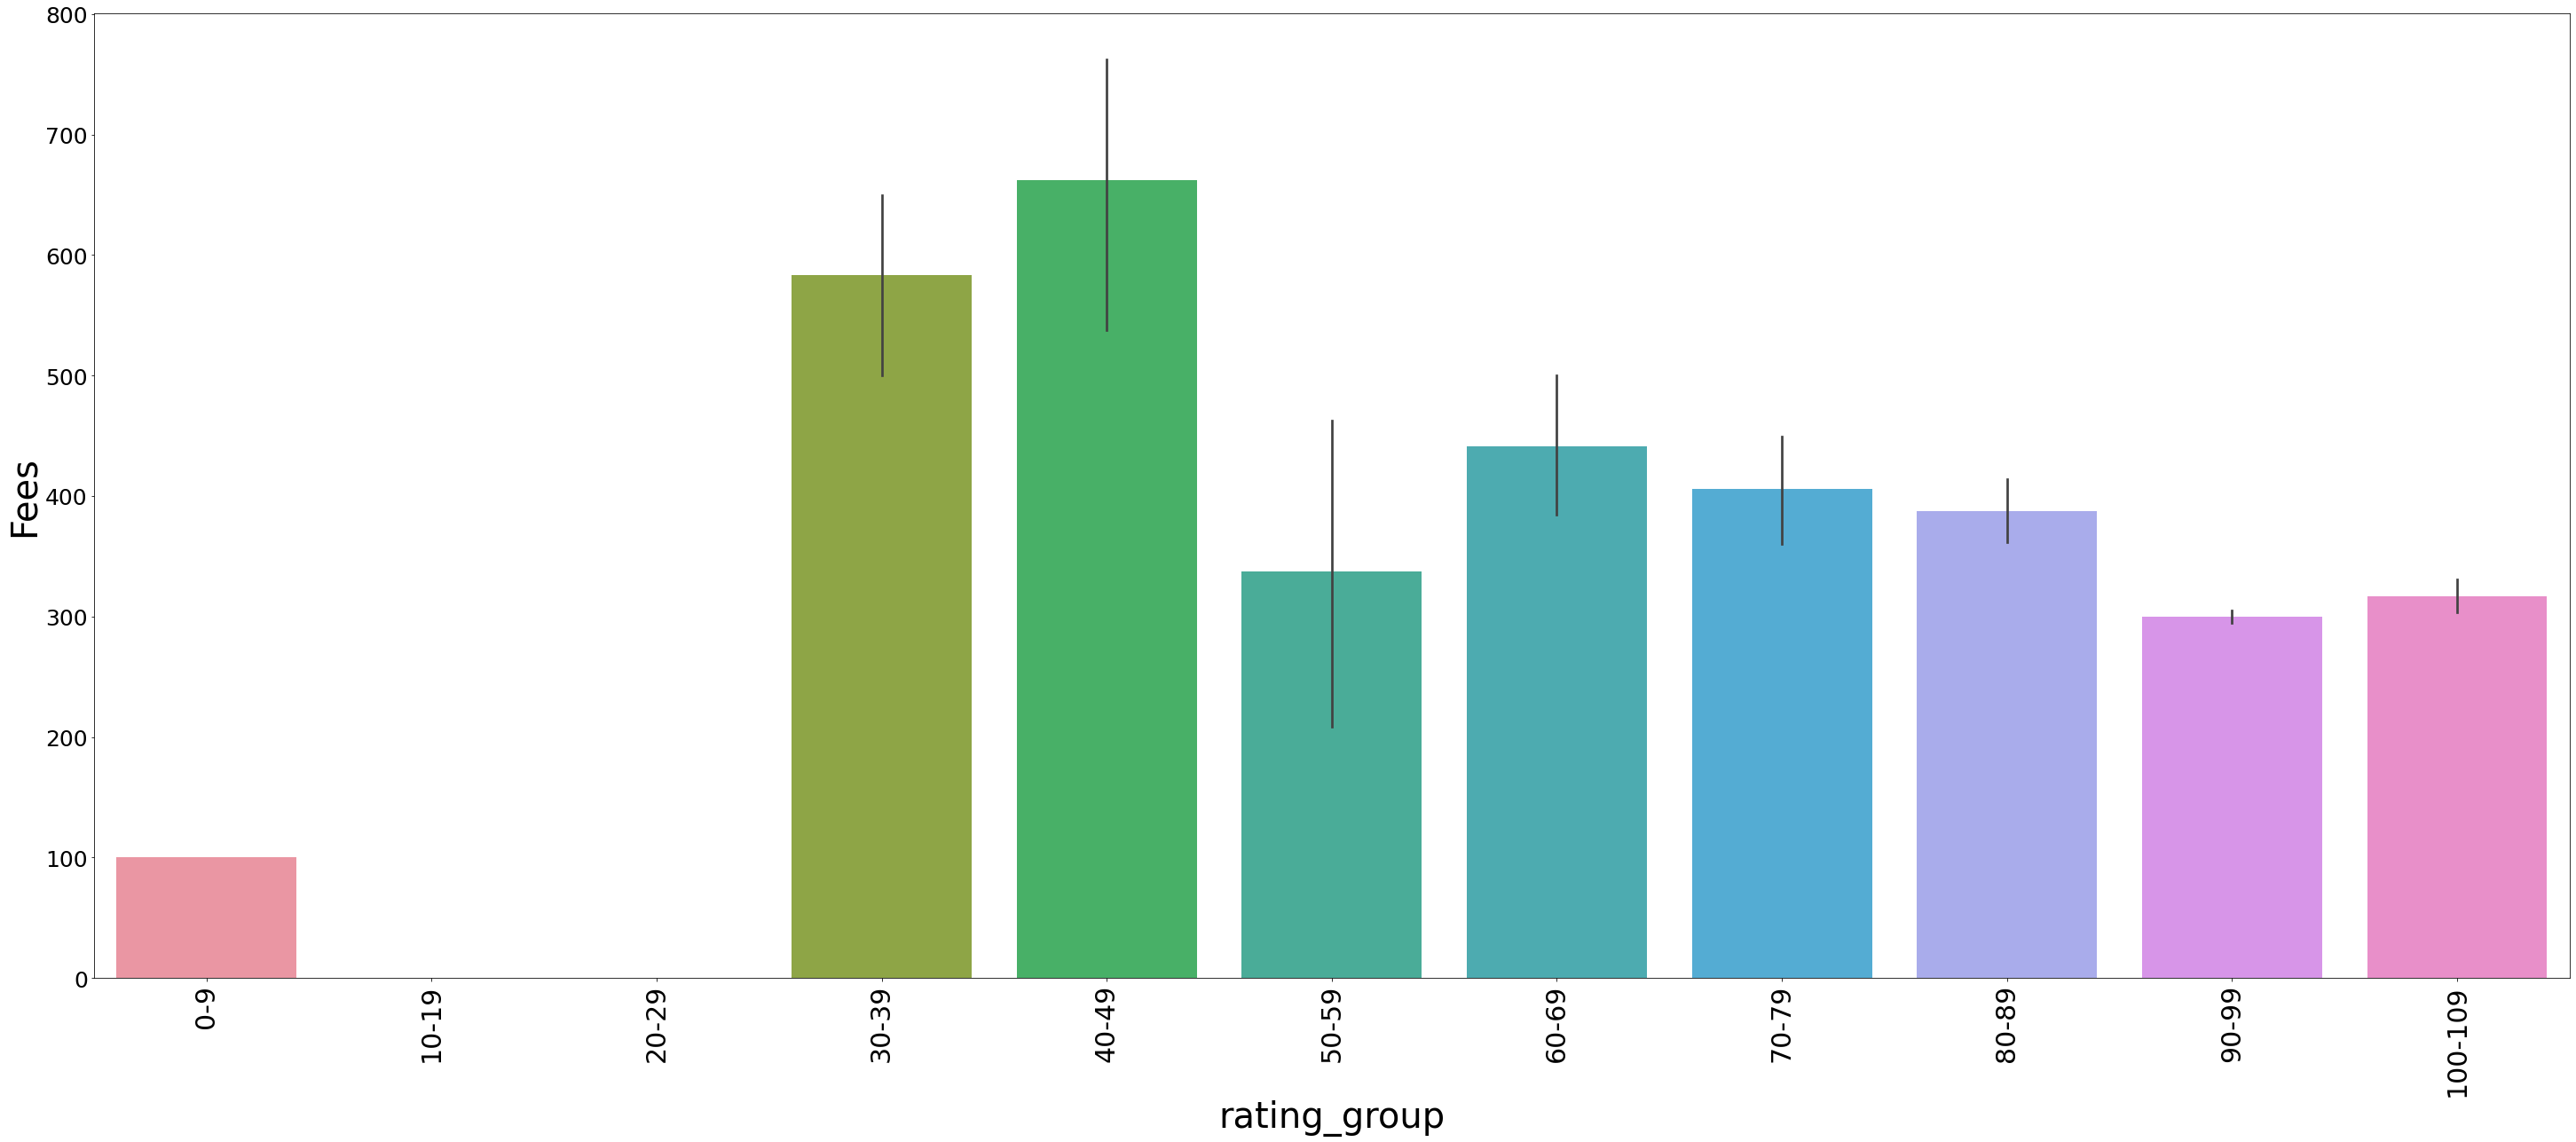

In [560]:
plt.figure(figsize=(50,20))
plt.xlabel("rating_group", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="rating_group",y="Fees",data=df)


Observation: Doctors with rating between 40-49 have more fees and least for 0-9

In [561]:
print(df["Experience"].max(),"\n",df["Experience"].min())
#creating bins on this basis

66 
 0


In [562]:
experience_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
df['experience_group'] = pd.cut(df["Experience"], range(0, 71, 10), right=False, labels=experience_labels)


experience_group
0-9      286.401102
10-19    319.770603
20-29    331.652502
30-39    320.093537
40-49    230.678571
50-59    254.761905
60-69    100.000000
Name: Fees, dtype: float64


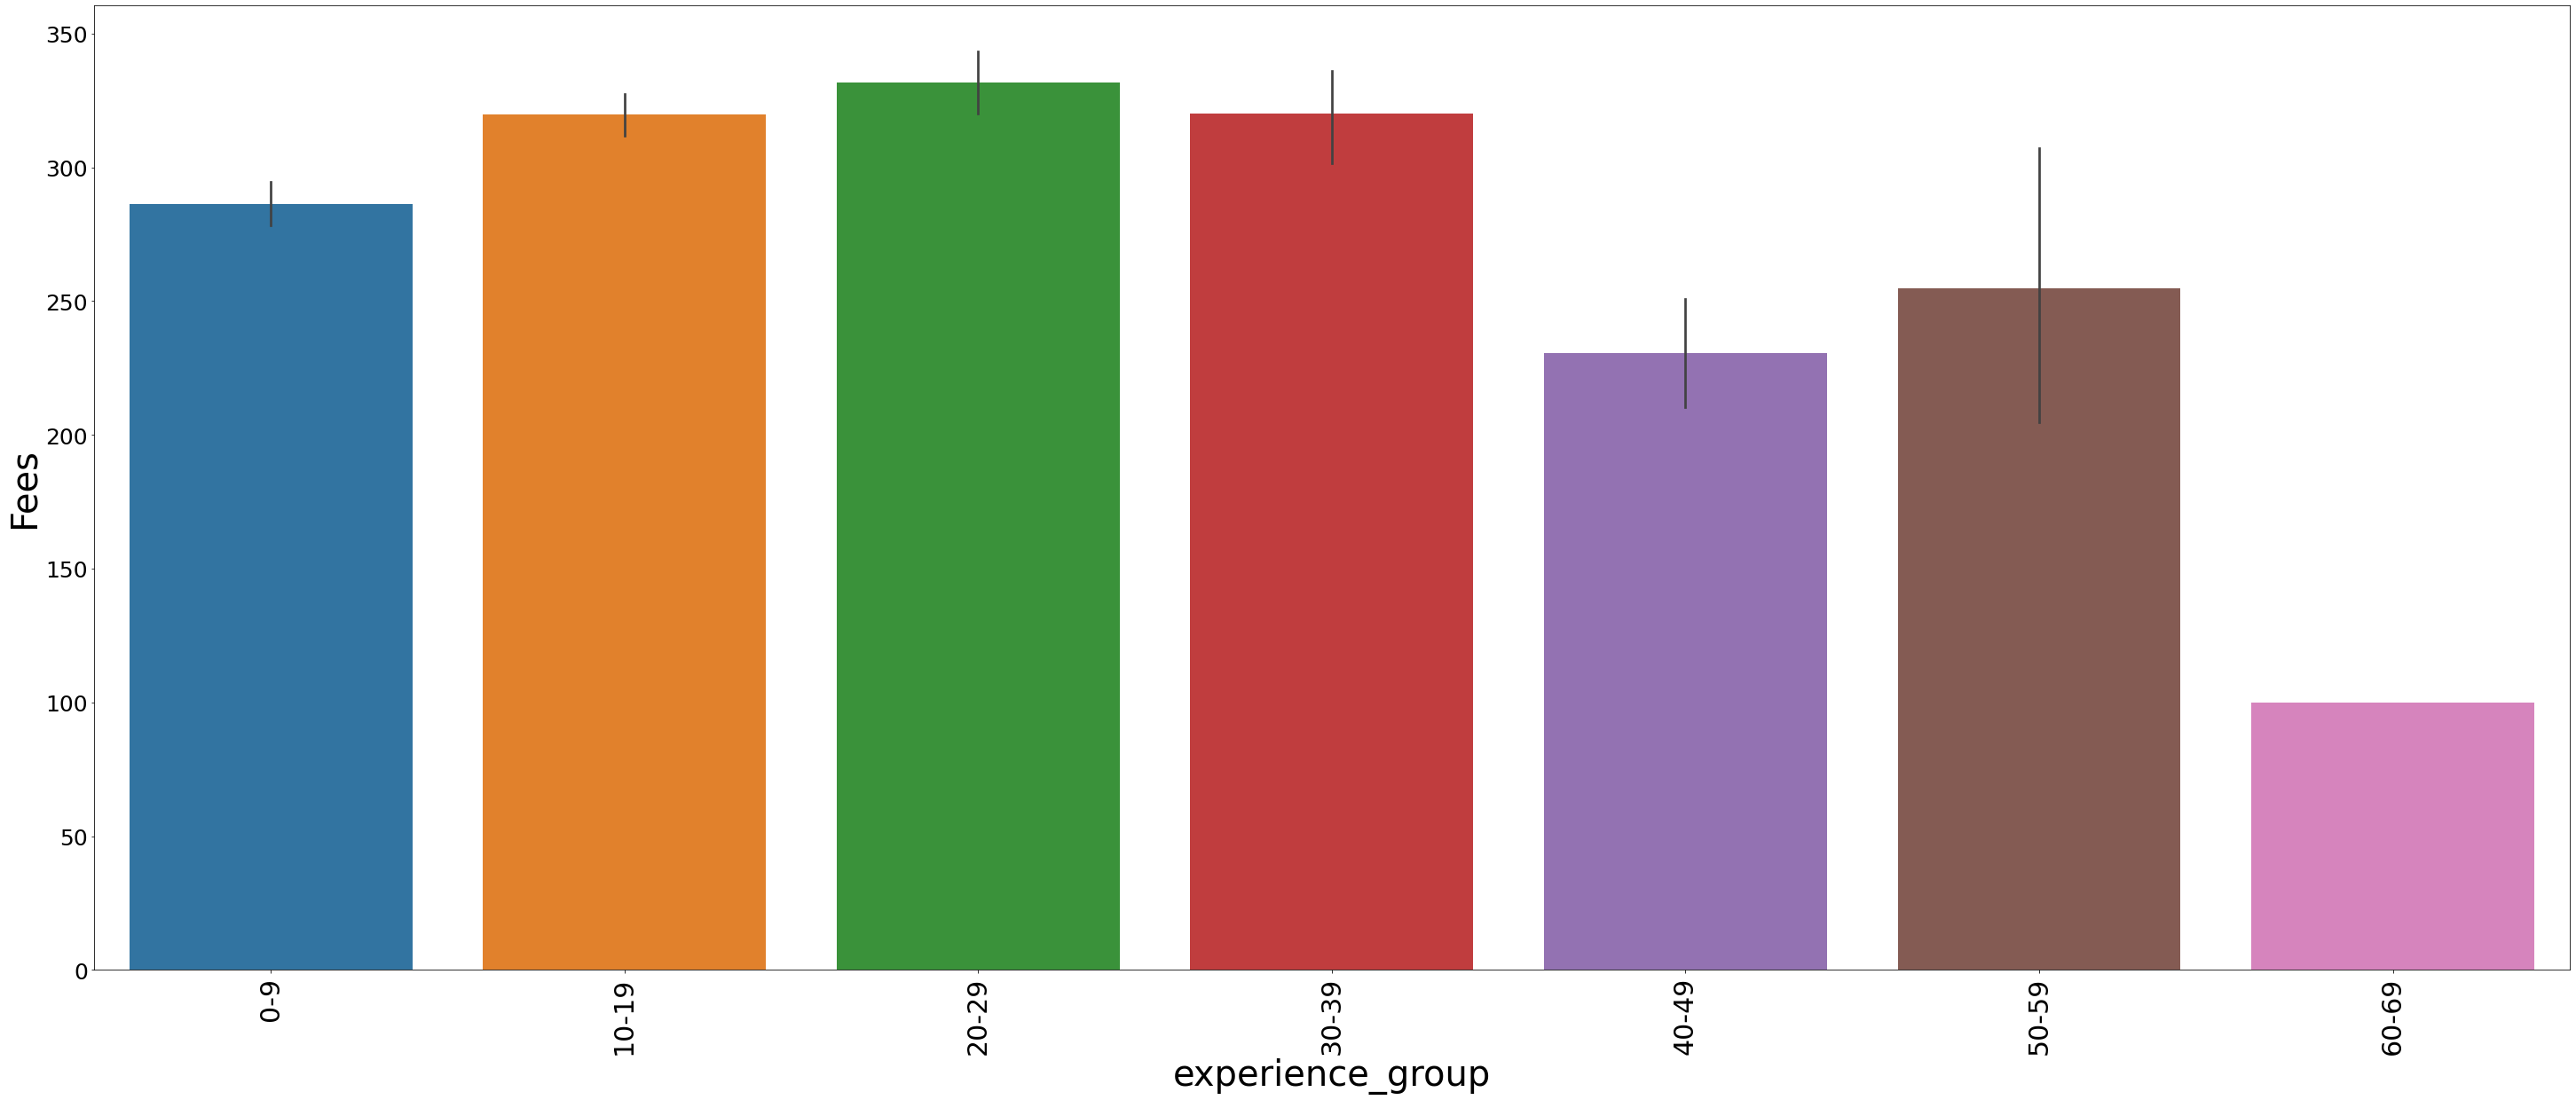

In [563]:
plt.figure(figsize=(50,20))
plt.xlabel("experience_group", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="experience_group",y="Fees",data=df)
print(df.groupby("experience_group").Fees.mean())

Observation:The fees is almost similiar for the range 10-19,20-29,30-39 .However doctors with maximum experience charge less

In [564]:
df.drop(columns=['rating_group', 'experience_group',"Qualification"],axis=1,inplace=True)

In [565]:
cols=['Profile','Location', 'City',"degree1",'degree2']
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in cols:
    df[i] = labelencoder.fit_transform(df[i])

In [566]:
corr_matrix=df.corr()
corr_matrix["Fees"].sort_values(ascending=False)

Fees          1.000000
degree1       0.233285
Profile       0.145226
Experience    0.002117
City         -0.020196
Location     -0.052750
rating(%)    -0.123751
degree2      -0.177216
Name: Fees, dtype: float64

In [567]:
df.drop(columns=["Experience"],axis=1,inplace=True)

In [568]:
df.skew()

Profile      0.108803
Fees         0.751870
rating(%)   -5.257248
Location     0.121186
City         0.003110
degree1      0.068299
degree2     -0.611330
dtype: float64

In [569]:
from sklearn.preprocessing import power_transform
df_skewed=power_transform(df,method="yeo-johnson")
df_new=pd.DataFrame(df_skewed,columns=df.columns)

In [570]:
df_new.skew()

Profile     -0.139151
Fees        -0.046217
rating(%)   -0.298024
Location    -0.263130
City        -0.217282
degree1     -0.155719
degree2     -0.498406
dtype: float64

In [571]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_new))
threshold=3
new_df =df_new[(z < 3).all(axis=1)]
#removing outliers
print(new_df.shape,"\n",df_new.shape)


(5958, 7) 
 (5961, 7)


Observation:Almost 200 rows dropped with z score more than 3

# Model Evalution

In [572]:
x_re=new_df.drop("Fees",axis=1)
y=new_df["Fees"]

In [573]:
#Scaling the columns 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_re)
x=sc.transform(x_re)
x=pd.DataFrame(x,columns=x_re.columns)

In [574]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [575]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state = 42,test_size=0.20)


In [576]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(X_train,Y_train)
    print("score of ",m, "is:",m.score(X_train,Y_train))
    predm=m.predict(X_test)
    print("ERROR:")
    print(" Mean absolute error:", mean_absolute_error(Y_test,predm))
    print("Mean squared error:",mean_squared_error(Y_test,predm))
    print("r2 score :",r2_score(Y_test,predm))
    print("\n")

score of  LinearRegression() is: 0.08178459728201215
ERROR:
 Mean absolute error: 0.7977924299185801
Mean squared error: 0.907261002345881
r2 score : 0.07086842072469901


score of  DecisionTreeRegressor() is: 0.9226815053795984
ERROR:
 Mean absolute error: 0.8397292717432551
Mean squared error: 1.3402185678262748
r2 score : -0.37252608816947475


score of  KNeighborsRegressor() is: 0.3716494238729203
ERROR:
 Mean absolute error: 0.7462754813584606
Mean squared error: 0.8870518918424641
r2 score : 0.09156469523582411


score of  SVR() is: 0.19519726894778666
ERROR:
 Mean absolute error: 0.7527195583046481
Mean squared error: 0.8668844423107182
r2 score : 0.11221830448931913


score of  Lasso() is: 0.0
ERROR:
 Mean absolute error: 0.8468022965978432
Mean squared error: 0.9764643108612844
r2 score : -3.113669192478241e-06


score of  Ridge() is: 0.081784595808712
ERROR:
 Mean absolute error: 0.7977931734701832
Mean squared error: 0.9072592548379471
r2 score : 0.07087021035833507


score 

In [577]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsRegressor()
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(x,y)
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}


In [578]:
knn=KNeighborsRegressor(algorithm= 'ball_tree', leaf_size= 5, n_jobs= -1, n_neighbors= 10, weights= 'uniform')
knn.fit(X_train,Y_train)
ypred=knn.predict(X_test)
print("score of ",knn, "is:",knn.score(X_train,Y_train))
print("ERROR:")
print(" Mean absolute error:", mean_absolute_error(Y_test,ypred))
print("Mean squared error:",mean_squared_error(Y_test,ypred))
print("r2 score :",r2_score(Y_test,ypred))
print("\n")

score of  KNeighborsRegressor(algorithm='ball_tree', leaf_size=5, n_jobs=-1,
                    n_neighbors=10) is: 0.26774907947832494
ERROR:
 Mean absolute error: 0.7331101013867368
Mean squared error: 0.8404715924396097
r2 score : 0.1392678666885644




# Performing similiar EDA as per above train dataset

In [650]:
test=pd.read_excel("Final_Test.xlsx")

In [651]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [652]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [653]:
test["rating(%)"]=test["Rating"].str.split("%").str[0]
test["rating(%)"]=pd.to_numeric(test["rating(%)"], errors='coerce')
test["rating(%)"]=test["rating(%)"].fillna(test["rating(%)"].median())
test.drop("Rating",axis=1,inplace=True)

In [654]:
test["Experience"]=test["Experience"].str.split(" ").str[0]
test["Experience"]=pd.to_numeric(test["Experience"], errors='coerce')

In [655]:
test.drop("Miscellaneous_Info",axis=1,inplace=True)

In [656]:
test["Location"]=test["Place"].str.split(",").str[0]

test["City"]=test["Place"].str.split(",").str[1]
test["city2"]=test["Place"].str.split(",").str[2]

In [657]:
test["city2"].unique()
#n null values dropping it

array([nan])

In [658]:
test.drop("city2",axis=1,inplace=True)

In [659]:
test["degree1"]=test["Qualification"].str.split(",").str[0]
test["degree2"]=test["Qualification"].str.split(",").str[1]

In [660]:
test.replace(to_replace =np.NaN, 
                 value ="Missing",inplace=True) 

In [661]:
test.drop(columns=["Qualification","Place","Experience"],axis=1,inplace=True)

In [662]:
cols=['Profile','Location', 'City',"degree1","degree2"]
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in cols:
    test[i] = labelencoder.fit_transform(test[i])

In [663]:
test.head()

,Profile,rating(%),Location,City,degree1,degree2
0,4,97.0,142,6,48,243
1,3,97.0,578,5,48,79
2,2,70.0,212,1,48,28
3,0,97.0,374,3,1,243
4,1,100.0,231,0,2,157


In [664]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(test))
threshold=3
test_new =test[(z < 3).all(axis=1)]
#removing outliers
print(test_new.shape,"\n",test.shape)


(1937, 6) 
 (1987, 6)


In [665]:
#Scaling the columns 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(test)
X=sc.transform(test_new)
X=pd.DataFrame(X,columns=test_new.columns)

In [666]:
X_train.head()

,Profile,rating(%),Location,City,degree1,degree2
944,-1.644843,0.002247,1.440641,-1.439735,-1.210020,0.272186
5708,-1.644843,1.133248,-0.244033,-1.439735,-1.210020,1.050479
3443,1.420133,0.002247,-0.220068,1.197053,-0.951484,-0.316428
12,-0.822874,0.519250,-1.069815,-0.318157,-1.114196,-0.075474
1117,1.420133,1.861184,0.232303,0.114929,-0.951484,1.075189


In [667]:
test.head()

,Profile,rating(%),Location,City,degree1,degree2
0,4,97.0,142,6,48,243
1,3,97.0,578,5,48,79
2,2,70.0,212,1,48,28
3,0,97.0,374,3,1,243
4,1,100.0,231,0,2,157


In [668]:
knn=KNeighborsRegressor(algorithm= 'ball_tree', leaf_size= 5, n_jobs= -1, n_neighbors= 10, weights= 'uniform')
knn.fit(X_train,Y_train)


KNeighborsRegressor(algorithm='ball_tree', leaf_size=5, n_jobs=-1,
                    n_neighbors=10)

In [669]:
test_new.shape

(1937, 6)

In [670]:
pred=knn.predict(test_new)

In [671]:
df_out=pd.DataFrame(pred)
df_out.to_csv("fees_doctor.csv")

In [672]:
import joblib
joblib.dump(knn,"fees_doctor.pkl")

['fees_doctor.pkl']